In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for your dataset
train_dir = r'C:\Users\Nida\Downloads\archive (3)\test'
test_dir = r'C:\Users\Nida\Downloads\archive (3)\train'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_acc * 100:.2f}%')


Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Epoch 1/20
21/21 [==============================] - 163s 8s/step - loss: 0.6041 - accuracy: 0.6773 - val_loss: 0.5211 - val_accuracy: 0.7277
Epoch 2/20
21/21 [==============================] - 79s 4s/step - loss: 0.5553 - accuracy: 0.7288 - val_loss: 0.5355 - val_accuracy: 0.7198
Epoch 3/20
21/21 [==============================] - 80s 4s/step - loss: 0.4981 - accuracy: 0.7515 - val_loss: 0.4909 - val_accuracy: 0.7550
Epoch 4/20
21/21 [==============================] - 89s 4s/step - loss: 0.5547 - accuracy: 0.6879 - val_loss: 0.5145 - val_accuracy: 0.7353
Epoch 5/20
21/21 [==============================] - 97s 5s/step - loss: 0.4430 - accuracy: 0.7727 - val_loss: 0.4279 - val_accuracy: 0.7846
Epoch 6/20
21/21 [==============================] - 92s 4s/step - loss: 0.4082 - accuracy: 0.8121 - val_loss: 0.5168 - val_accuracy: 0.7501
Epoch 7/20
21/21 [==============================] - 85s 4s/step - loss: 0.43

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Define directories for your dataset
train_dir = r'C:\Users\Nida\Downloads\archive (3)\train'
test_dir =  r'C:\Users\Nida\Downloads\archive (3)\test'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Load the VGG16 network, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Freeze the VGG16 layers
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_acc * 100:.2f}%')


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


C:\Users\Nida\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
83/83 [==============================] - 2181s 26s/step - loss: 0.4993 - accuracy: 0.7509 - val_loss: 0.3722 - val_accuracy: 0.8348
Epoch 2/20
83/83 [==============================] - 2227s 27s/step - loss: 0.3976 - accuracy: 0.8138 - val_loss: 0.3472 - val_accuracy: 0.8424
Epoch 3/20
83/83 [==============================] - 1883s 23s/step - loss: 0.4016 - accuracy: 0.8176 - val_loss: 0.3889 - val_accuracy: 0.8303
Epoch 4/20
83/83 [==============================] - 1662s 20s/step - loss: 0.3685 - accuracy: 0.8305 - val_loss: 0.3375 - val_accuracy: 0.8455
Epoch 5/20
83/83 [==============================] - 1665s 20s/step - loss: 0.3550 - accuracy: 0.8312 - val_loss: 0.3374 - val_accuracy: 0.8424
Epoch 6/20
83/83 [==============================] - 1888s 23s/step - loss: 0.3429 - accuracy: 0.8403 - val_loss: 0.3223 - val_accuracy: 0.8500
Epoch 7/20
83/83 [==============================] - 2181s 26s/step - loss: 0.3315 - accuracy: 0.8601 - val_loss: 0.3196 - val_accuracy: 0.8530

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Define directories for your dataset
train_dir = r'C:\Users\Nida\Downloads\archive (3)\train'
test_dir = r'C:\Users\Nida\Downloads\archive (3)\test'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # Using 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load the VGG16 network, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a new model on top of the pre-trained base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Unfreeze some of the top layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:  # Adjust number of layers to unfreeze
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Predictions and metrics
preds = model.predict(test_generator)
y_pred = (preds > 0.5).astype(int)
y_true = test_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred))


Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


C:\Users\Nida\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
13/66 [====>.........................] - ETA: 24:31 - loss: 0.7073 - accuracy: 0.5288

In [2]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


url = 'https://raw.githubusercontent.com/dataprofessor/data/master/wdbc.csv'
data = pd.read_csv(url, header=None)

# Assign column names (based on the dataset's description)
data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Drop the ID column as it's not needed for the analysis
data.drop(columns=['ID'], inplace=True)

# Map the diagnosis to binary values
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


HTTPError: HTTP Error 404: Not Found

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load the dataset from your local system
data = pd.read_csv(r'C:\Users\Nida\Downloads\new student\dataset.csv', header=None)

# Assign column names (based on the dataset's description)
data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Drop the ID column as it's not needed for the analysis
data.drop(columns=['ID'], inplace=True)

# Map the diagnosis to binary values
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


ValueError: Length mismatch: Expected axis has 33 elements, new values have 32 elements

In [ ]:
pip install pandas numpy scikit-learn tensorflow


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths
images_path = 'path_to_images_folder'  # Folder containing image files
metadata_path = 'path_to_metadata.csv' # CSV file with metadata (image IDs and labels)

# Load metadata
metadata = pd.read_csv(metadata_path)
metadata['image_path'] = metadata['image_id'].apply(lambda x: f'{images_path}/{x}.jpg')


In [ ]:
# Map diagnosis labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(metadata['dx'].unique())}
metadata['label'] = metadata['dx'].map(label_mapping)

# Split the data into training and testing sets
train_df, test_df = train_test_split(metadata, test_size=0.2, stratify=metadata['label'], random_state=42)

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, x_col='image_path', y_col='dx', target_size=(128, 128), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(test_df, x_col='image_path', y_col='dx', target_size=(128, 128), batch_size=32, class_mode='categorical')


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=25, validation_data=test_generator)


In [ ]:
# Make predictions on the test set
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset from your local system
data = pd.read_csv(r'C:\Users\Nida\Downloads\new student\dataset.csv', header=None)

# Assign column names (based on the dataset's description)
data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Drop the ID column as it's not needed for the analysis
data.drop(columns=['ID'], inplace=True)

# Map the diagnosis to binary values
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


In [12]:
pip install matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


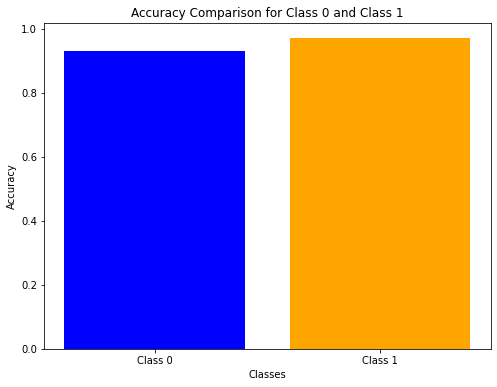

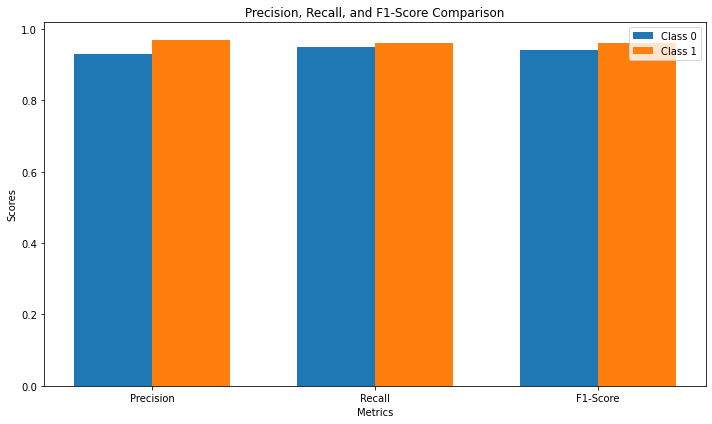

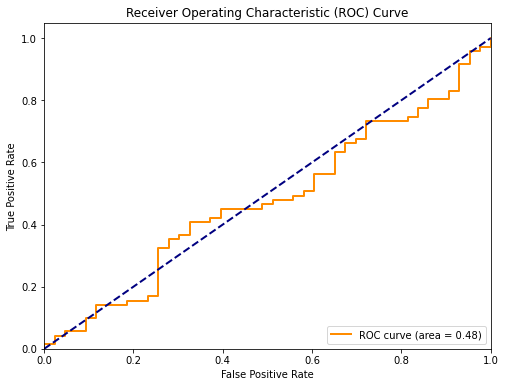

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assume the following values are from your classification report
accuracy = 0.956140350877193
precision = [0.93, 0.97]
recall = [0.95, 0.96]
f1 = [0.94, 0.96]
support = [43, 71]

# Labels for the classes
classes = ['Class 0', 'Class 1']

# Accuracy Comparison Graph
plt.figure(figsize=(8, 6))
plt.bar(classes, [precision[0], precision[1]], color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Class 0 and Class 1')
plt.show()

# Precision, Recall, and F1-Score Comparison Graph
metrics = ['Precision', 'Recall', 'F1-Score']
class_0_metrics = [precision[0], recall[0], f1[0]]
class_1_metrics = [precision[1], recall[1], f1[1]]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, class_0_metrics, width, label='Class 0')
rects2 = ax.bar(x + width/2, class_1_metrics, width, label='Class 1')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

# ROC Curve
# Simulate some example prediction probabilities
y_test = np.array([0] * 43 + [1] * 71)  # True labels
y_pred_prob = np.random.rand(114)  # Simulate prediction probabilities

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
